

# Spotify 2024 Wrapped Analysis

In [41]:
import pandas as pd
import matplotlib.pyplot as plt 

from datetime import datetime
import json


## Initial Setup and Data Loading


The files where downloaded from Spotify and they contain my audio history from 2022 and 2024 until 19.12.2024 but in this case I don't care about data of 2022 and 2023 so it's necessary to filter and keep only with the auidio hitory from 2024


In [12]:

# laod JSON file
with open("../my_spotify_data/Streaming_History_Audio_2022-2024_1.json", "r",encoding="utf-8") as file:
    data = json.load(file)

# Fiter data in 2024
filtered_data = [record for record in data if datetime.fromisoformat(record["ts"]).year == 2024]

# Save filter data in a JSON file
with open("../data/Spotify_Streaming_History_Audio_2024.json", "w") as output_file:
    json.dump(filtered_data, output_file, indent=4)


Now with already having the data from 2024, the file data structure is a json list containg elements with the following structure:

```json
{
    "ts": "2024-01-07T01:43:34Z",           # Timestamp of when the track was played (ISO format)
    "platform": "ios",                       # Platform used to play the track (ios, android, web, etc)
    "ms_played": 17066,                      # Milliseconds the track was played
    "conn_country": "AR",                    # Country code where the track was played
    "ip_addr": "181.16.121.35",             # IP address used when playing
    "user_agent_decrypted": "unknown",       # User agent of the device/browser
    "master_metadata_track_name": "Song",    # Name of the track
    "master_metadata_album_artist_name": "Artist", # Name of the artist
    "master_metadata_album_album_name": "Album",   # Name of the album
    "spotify_track_uri": "spotify:track:...", # Unique Spotify URI for the track
    "episode_name": null,                    # Name of podcast episode (if applicable)
    "episode_show_name": null,               # Name of podcast show (if applicable)
    "spotify_episode_uri": null,             # Unique Spotify URI for podcast episode
    "reason_start": "trackdone",            # Why the track started playing
    "reason_end": "trackdone",              # Why the track stopped playing
    "shuffle": false,                       # Whether shuffle was enabled
    "skipped": false,                       # Whether the track was skipped
    "offline": false,                       # Whether played in offline mode
    "offline_timestamp": 1705338287,        # Timestamp if played offline
    "incognito_mode": false                 # Whether played in incognito mode
}
```

In [19]:
# Load data function
def load_streaming_data(file_path):
    """
    Loads Spotify streaming data from JSON file
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return pd.DataFrame(data)

## Initial Exploration


In [20]:
# Load the data
df = load_streaming_data('../data/Spotify_Streaming_History_Audio_2024.json')
df.head()

,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2024-01-07T01:43:34Z,ios,17066,AR,181.16.121.35,None,None,None,None,LIVE Data Analyst Q&A Ft. Alex The Analyst,codebasics,spotify:episode:6akNJ2WMsE8quJJYLdtWio,clickrow,endplay,False,True,False,1704591393,False
1,2024-01-07T01:44:03Z,ios,27349,AR,181.16.123.179,None,None,None,None,How AI Reshaped This Data Analyst's Job (Luke ...,Ken's Nearest Neighbors,spotify:episode:3bE1x3AmCHpW3hc7RUNMZ7,clickrow,unexpected-exit-while-paused,False,False,False,1704591815,False
2,2024-01-07T14:49:25Z,ios,3527610,AR,181.16.123.179,None,None,None,None,How AI Reshaped This Data Analyst's Job (Luke ...,Ken's Nearest Neighbors,spotify:episode:3bE1x3AmCHpW3hc7RUNMZ7,appload,endplay,False,True,False,1704630979,False
3,2024-01-07T15:43:06Z,ios,223930,AR,181.16.123.179,None,None,None,None,Why He Quit Being an Analytics Manager ( @Alex...,Ken's Nearest Neighbors,spotify:episode:5KK3tvkfs334frTr7UCIYQ,clickrow,endplay,False,True,False,1704638966,False
4,2024-01-15T17:13:58Z,ios,1720,AR,186.143.202.239,None,None,None,None,Finding Your Tribe in the Tech World (Rabie Za...,Ken's Nearest Neighbors,spotify:episode:1aA293j1Pb1YfgQEhDvocP,trackdone,endplay,False,True,False,1705338287,False


In [24]:
# its always good to check the data types of the columns. I was expecting ts to be a datetime object
df.dtypes

ts                                   object
platform                             object
ms_played                             int64
conn_country                         object
ip_addr                              object
master_metadata_track_name           object
master_metadata_album_artist_name    object
master_metadata_album_album_name     object
spotify_track_uri                    object
episode_name                         object
episode_show_name                    object
spotify_episode_uri                  object
reason_start                         object
reason_end                           object
shuffle                                bool
skipped                                bool
offline                                bool
offline_timestamp                     int64
incognito_mode                         bool
dtype: object

In [26]:
# Convert ts to datetime
df['ts'] = pd.to_datetime(df['ts'])
df.dtypes

ts                                   datetime64[ns, UTC]
platform                                          object
ms_played                                          int64
conn_country                                      object
ip_addr                                           object
master_metadata_track_name                        object
master_metadata_album_artist_name                 object
master_metadata_album_album_name                  object
spotify_track_uri                                 object
episode_name                                      object
episode_show_name                                 object
spotify_episode_uri                               object
reason_start                                      object
reason_end                                        object
shuffle                                             bool
skipped                                             bool
offline                                             bool
offline_timestamp              

## Basic agregations to understand the data


In [27]:
# Which are the artists I have listened to?
df ['master_metadata_album_artist_name'].unique ()

array([None, 'Serú Girán', 'Hoobastank', 'R.E.M.', 'The Verve',
       'Aerosmith', 'Extreme', "Guns N' Roses", 'Bon Jovi', 'Bryan Adams',
       'Pink Floyd', 'Scorpions', "Sinéad O'Connor", 'Jeff Buckley',
       'The Police', 'Van Halen', 'Alphaville', 'Phil Collins',
       'John Lennon', 'The Beatles', 'No Doubt', 'Natalie Imbruglia',
       '4 Non Blondes', 'Radiohead', 'Nirvana', 'The Rolling Stones',
       'The Cranberries', 'Creedence Clearwater Revival', 'Foreigner',
       'Europe', 'Avril Lavigne', 'P!nk', 'Lady Gaga', 'Carly Rae Jepsen',
       'One Direction', 'Ellie Goulding', 'Taylor Swift', 'Sia',
       'Christina Perri', 'John Legend', 'Miley Cyrus', 'Alicia Keys',
       'OneRepublic', 'Imagine Dragons', 'AWOLNATION', 'Fall Out Boy',
       'Twenty One Pilots', 'Ed Sheeran', 'Alan Walker', 'Mark Ronson',
       'Evanescence', 'Robbie Williams', 'Metallica', 'AC/DC',
       'Tom Odell', 'AURORA', 'GAYLE', 'Olivia Rodrigo', 'Måneskin',
       'Bella Poarch', 'U2', 'J

In [30]:
# but how many exactly ?
df ['master_metadata_album_artist_name'].unique ().size

108

I wonder if I will see something different aggregating the amount of unique artists listened
over month instead of the year

In [31]:
df ['year'] = df ['ts'].dt.year
df ['month' ] = df ['ts' ]. dt.month

# amount of unique artists per month per year
df_agg = df.groupby(['year', 'month'])
df_agg['master_metadata_album_artist_name'].nunique()

# lets check 
print(f"""2024:{df_agg['master_metadata_album_artist_name'].nunique().loc[2024]} """)

2024:month
1      0
2      0
3      0
4      0
5      1
6     75
7      0
8      0
9      1
10    20
11     1
12    13
Name: master_metadata_album_artist_name, dtype: int64 


Now let's dive deep into the analysis of the data in 2024

## Top Artists 2024

In [32]:
# Well we are agregating over to years, lets split them
df ['year' ] = df ['ts' ].dt.year
df_2024 = df [df ['year' ] == 2024]

# transform ms_played to minutes
df_2024['minPlayed'] = df_2024['ms_played'] / 1000 / 60

# sum of msPlayed by artist per month
df_agg = df_2024.groupby(['year', 'master_metadata_album_artist_name'])
df_agg['minPlayed'].sum()

#top 10 artists by min played
df_agg['minPlayed' ].sum().sort_values(ascending=False).head(10)

year  master_metadata_album_artist_name
2024  Lenny Kravitz                        18.547167
      U2                                    1.948983
      Coldplay                              1.946833
      Madonna                               1.795600
      Avril Lavigne                         1.455333
      4 Non Blondes                         1.420833
      Olivia Rodrigo                        1.310333
      Bon Jovi                              1.221450
      Robbie Williams                       1.195500
      R.E.M.                                1.005667
Name: minPlayed, dtype: float64

## Top Artist per month.



This could be either the one I listen to the most or the one I was searching the most so lets do both

In [37]:
# Well we are agregating over to years, lets split them
df['year'] = df['ts'].dt.year
df_2024 = df[df['year'] == 2024]

# transform ms_played to minutes
df_2024['minPlayed'] = df_2024['ms_played'] / 1000 / 60

# sum of ms_played by artist per month
df_agg = df_2024.groupby(['month', 'master_metadata_album_artist_name'])['minPlayed'].sum()

# lets print the result per month
for month in df_2024['month'].unique():  # Only iterate for the month that has value
    print(f"Month {month}:")
    try:
        print(df_agg.loc[month].sort_values(ascending=False).head(5))
    except KeyError:
        print("No data for this month")
    print("\n")

Month 1:
No data for this month


Month 2:
No data for this month


Month 3:
No data for this month


Month 4:
No data for this month


Month 5:
master_metadata_album_artist_name
Serú Girán    0.742083
Name: minPlayed, dtype: float64


Month 6:
master_metadata_album_artist_name
Coldplay          1.946833
U2                1.898500
Avril Lavigne     1.455333
4 Non Blondes     1.420833
Olivia Rodrigo    1.310333
Name: minPlayed, dtype: float64


Month 7:
No data for this month


Month 8:
No data for this month


Month 9:
master_metadata_album_artist_name
Lenny Kravitz    18.547167
Name: minPlayed, dtype: float64


Month 10:
master_metadata_album_artist_name
Madonna           1.795600
KT Tunstall       0.127283
Colette           0.117333
David Morales     0.112683
Ray LaMontagne    0.109850
Name: minPlayed, dtype: float64


Month 11:
master_metadata_album_artist_name
Melej    0.076083
Name: minPlayed, dtype: float64


Month 12:
master_metadata_album_artist_name
Melej             0.184533


C:\Users\esposito\AppData\Local\Temp\ipykernel_14164\641945387.py:13: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_artist = df_agg.get_group(artist)
C:\Users\esposito\AppData\Local\Temp\ipykernel_14164\641945387.py:13: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_artist = df_agg.get_group(artist)
C:\Users\esposito\AppData\Local\Temp\ipykernel_14164\641945387.py:13: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_artist = df_agg.get_group(artist)
C:\Users\esposito\AppData\Local\Temp\ipykernel_14164\641945387.py:13: FutureWarnin

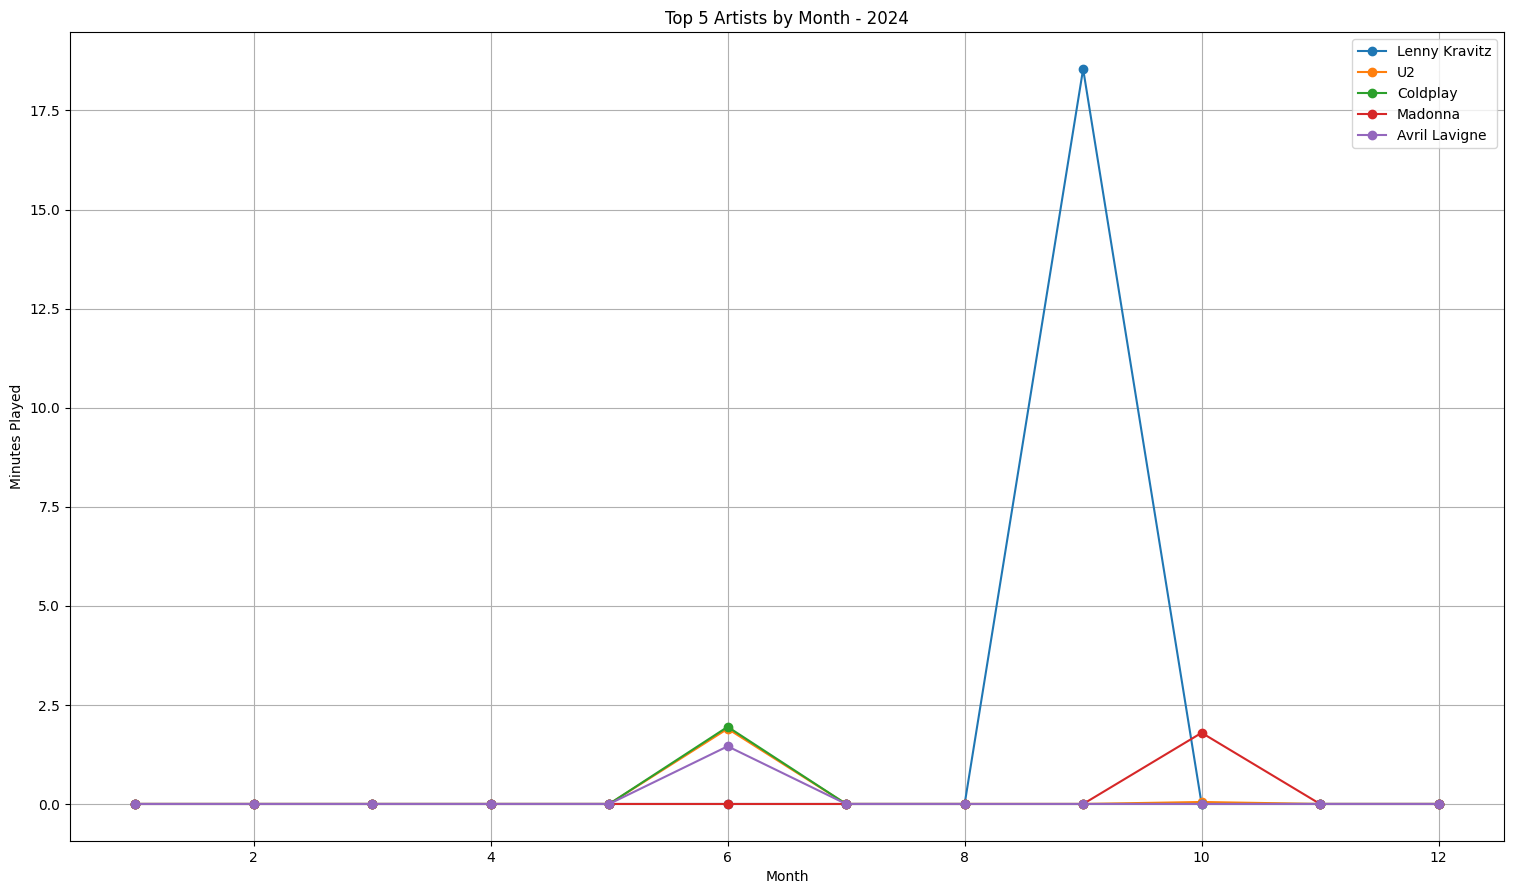

In [40]:
# Get the top 5 artists played in 2024
df_agg = df_2024.groupby(['master_metadata_album_artist_name'])
df_top = df_agg['minPlayed'].sum().sort_values(ascending=False).head(5)

# Create a figure
plt.figure(figsize=(18.5, 10.5))

# Create complete month range
all_months = range(1, 13)

for artist in df_top.index:
    # Get data for this artist
    df_artist = df_agg.get_group(artist)
    monthly_data = df_artist.groupby(['month'])['minPlayed'].sum()
    
    # Reindex to include all months, filling missing months with 0
    monthly_data = monthly_data.reindex(all_months, fill_value=0)
    
    # Plot the complete series
    monthly_data.plot(label=artist, marker='o')

plt.xlabel('Month')
plt.ylabel('Minutes Played')
plt.title('Top 5 Artists by Month - 2024')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\esposito\AppData\Local\Temp\ipykernel_14164\3010985409.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg['date' ] = pd.to_datetime(df_agg[['year', 'month', 'day' ]])


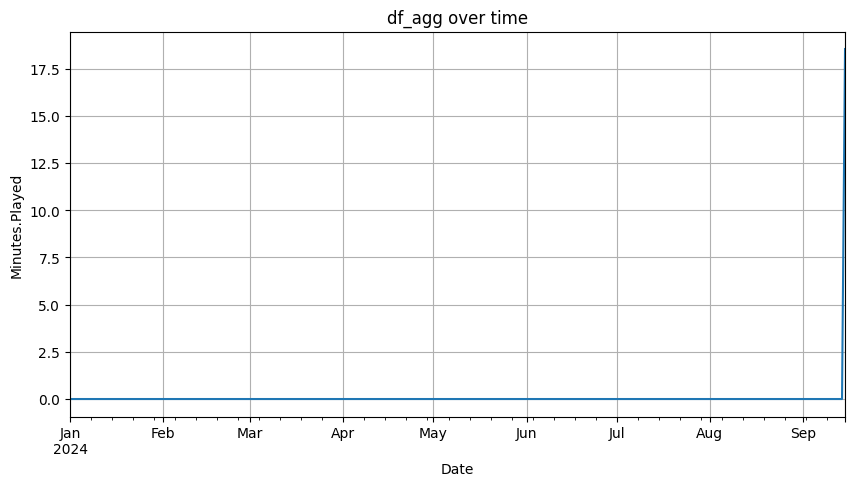

In [47]:
# Why is Lenny Kravitz so big in the graph?

df_2024['day'] = df_2024['ts'].dt.day

df_agg = df_2024[df_2024['master_metadata_album_artist_name' ] == 'Lenny Kravitz']

# Create a.'date' column for easier handling
df_agg['date' ] = pd.to_datetime(df_agg[['year', 'month', 'day' ]])

# Group.by date and.sum the.'minPlayed' column
df_agg = df_agg.groupby('date') ['minPlayed'].sum()

# Create a.date range that.covers.all.days.in the period
date_range = pd.date_range(start='2024-01-01', end=df_agg.index.max())

# Reindex df_agg to include all.days, filling.missing.values.with.0
df_agg = df_agg.reindex(date_range, fill_value=0)

# Plot the data
plt.figure(figsize=(10, 5))
df_agg.plot()
plt.xlabel('Date')
plt.ylabel('Minutes.Played')
plt.title('df_agg over time')
plt.grid(True)
plt.show()